# Algonaut Project:   Humans vs Vehicles

This page was
built for a project at [NeuroMatch Academy](https://portal.neuromatchacademy.org/).

## Groupname
   **Scholarly-Bears/Jaces**

## Contributors:
- Jon McGill
- Atharva Kand
- Ceri Ngai
- Ernest Kirubakaran Selvaraj

## Group TA
Tanya Rubinstein

## Project TA
Mo Shahdloo

## Project Mentor
Andrey Chetverikov

## Project Proposal Link
- [Google Docs](https://docs.google.com/document/d/1KMcoqIicDDi2zRdMfMPdClroXQhrDjfQ1lNIeIGjK9M/edit)
- [Slides](https://docs.google.com/presentation/d/1DAwRs5ButlI7zlsJmpT6YlRSQ-YjDh4CB3Cbhat95xs/edit#slide=id.ge51dc41796_2_83)

## Algonauts2021:

- [Github](https://github.com/Neural-Dynamics-of-Visual-Cognition-FUB/Algonauts2021_devkit)

- [Research](https://arxiv.org/abs/2104.13714v1)

- [Google Colab](https://colab.research.google.com/drive/1FljzKYPtE5sYoSHQ4g02re3iruEPI0Vz?usp=sharing#scrollTo=PL_VxeyuoeKu)

## Other Science links:
- [Brainviewer](https://gallantlab.org/brainviewer/huthetal2012/)
   
- [Semantic space (objects vs humans)](https://www.cell.com/neuron/fulltext/S0896-6273(12)00934-8?_returnURL=https%3A%2F%2Flinkinghub.elsevier.com%2Fretrieve%2Fpii%2FS0896627312009348%3Fshowall%3Dtrue)

## Data/Statistical analysis techniques:

- [Searchlight](https://nilearn.github.io/auto_examples/02_decoding/plot_haxby_searchlight.html)

- [PCA](https://stats.stackexchange.com/questions/2691/making-sense-of-principal-component-analysis-eigenvectors-eigenvalues)



**Keywords:** video stimuli, brain responses, algonauts dataset, voxel activity

    
    

## TODO List
- [ ] Create Contents
- [ ] Thumbnails for videos
- [ ] Other document additions, more theory for presentation day
- [ ] Searchlight implementation explanation
- [ ] Data Visualization and Analysis
- [ ] Conclusions
- [ ] What are the limitations and future directions? 
- [ ] PowerPoint presentation/slides

## Contents

1. [Project Section]()
2. [Abstract]()
3.
4.
5.


## Scientific Questions


Can we predict the human brain’s response to various video stimuli? 
Can we build a model of voxel activity in the human brain’s response to various video stimuli?
How are these different categories represented in the brain? 
    Semantic selectivity
    Animate vs inanimate categories represented in the same way/recognised differently
    Are there different areas in the brain that are responsible for this


## What is the phenomena? 

Humans are usually able to differentiate between animate and inanimate objects, e.g. human versus vehicles, in everyday life. 

## What was our hypothesis?

That humans and vehicles have separate pipelines (a chain of brain regions)  for processing:

So for all videos H (human) and video V (vehicle), examine the voxels in each brain region, to determine if there is a statistically significant dissimilarity, hypothesiing that yes there are.  And we can visualize the results:

- V1 
- V2
- V3
- V4
- **LOC**
- **EBA**
- **FFA**
- **STS**
- PPA

## Abstract
Humans are usually able to differentiate between animate and inanimate objects, e.g. human versus vehicles, in everyday life. Previous research has proposed different ways through which categorical perception may be represented in the brain, for instance in specific cortical areas or organised within a continuous semantic space wherein semantically similar categories are represented in nearby points in the cortex. This project investigates the organisation of this semantic space through the specific example of humans versus vehicles using voxelwise models. We hypothesise that visual stimuli containing humans (i.e. an animate object) and vehicles (i.e. an inanimate object) are represented in different areas of the brain. Here we use the Algonauts 2021 fMRI dataset to find brain regions that have active voxels given different video stimuli of humans and vehicles. The voxel activity for a given stimulus is then mapped on to the corresponding brain region. We expect to see higher dissimilarities in brain activations when comparing human-to-vehicle stimuli than when comparing human-to-human stimuli. This will be reflected in higher regions of the visual system as opposed to the primary visual cortex. The results will contribute to our existing understanding of the ways in which visual 
information is represented in the human brain. 

## How did your model work?
We calculate a Representational Dissimilarity Matrix(RDM) for the two categories (here humans vs. vehicles) against each other and subsequently perform Respresentational Similarity Analysis (RSA) of the computed RDM against voxel activations within the brain. The output correlation for a given stimulus is then mapped on to the corresponding brain region. 

## Implementation
Python/Jupyter Notebook
Code starts below, starting with python imports.

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import os
import pickle
import neurora
import numpy as np
import pandas as pd
import nibabel as nib
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import KFold
from sklearn.feature_selection import f_classif
from sklearn.preprocessing import StandardScaler

import nilearn.decoding
from nilearn import image
from nilearn import datasets
from nilearn import plotting
from nilearn.image import index_img
from nilearn.input_data import NiftiMasker
from nilearn.plotting import plot_stat_map, plot_img, show
from nilearn.image import new_img_like, load_img, get_data

%matplotlib inline

## fMRI Data
The Algonauts dataset provides human brain responses to a set of 1,102 3-s long video clips of everyday events. The brain responses are measured with functional magnetic resonance imaging (fMRI). fMRI is a widely used brain imaging technique with high spatial resolution that measures blood flow changes associated with neural responses.

The training set consists of 1,000 video clips and the associated brain responses. The brain responses are provided here in two tracks corresponding to two independent tracks in the Algonauts challenge.

In the **full track**, brain responses provided are from selected voxels across the whole brain showing reliable responses to videos. The figure below shows the reliability values of different voxels in the brain.

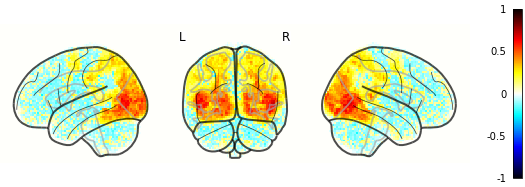

In the **mini track**, brain responses provided are from a set of specific regions of interest (ROIs) known to play a key role in visual perception. These ROIs start in early and mid-level visual cortex (V1, V2, V3, and V4) and extend into higher-level cortex that responds preferentially to all objects or particular categories (Body- EBA; Face - FFA, STS; Object - LOC; Scene - PPA). In the figure below we show the masks of the above mentioned ROIs for an example subject.


### Regions of Interest (ROIs)
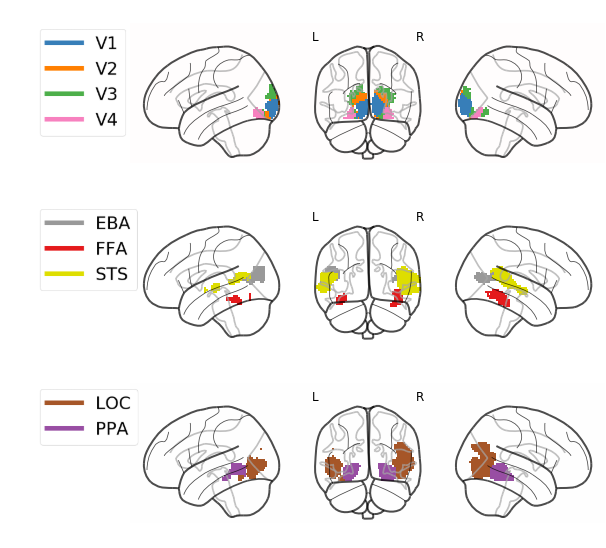

In [3]:
rois = ["V1", "V2", "V3", "V4","LOC", "EBA", "FFA","STS", "PPA"]
subs = ["sub01", "sub02", "sub03", "sub04", "sub05", "sub06", "sub07", "sub08", "sub09", "sub10"]

### Downloading/Loading the Algonauts / fMRI data
The trainig dataset contains 1,000 3-second videos + fMRI human brain data of 10 subjects in response to viewing videos from this set. 

The ROI data is provided for 9 ROIs of the visual brain (V1, V2, V3, V4, LOC, EBA, FFA, STS, PPA) in a Pickle file (e.g. V1.pkl) that contains a num_videos x num_repetitions x num_voxels matrix. For each ROI, we selected voxels that showed significant split-half reliability.

The whole brain data is provided for selected voxels across the whole brain showing reliable responses to videos in a Pickle file (e.g. WB.pkl) that contains a num_videos x num_repetitions x num_voxels matrix.



In [4]:
def load_dict(filename_):
    with open(filename_, 'rb') as f:
        u = pickle._Unpickler(f)
        u.encoding = 'latin1'
        ret_di = u.load()
        #print(p)
        #ret_di = pickle.load(f)
    return ret_di

def save_dict(di_, filename_):
    with open(filename_, 'wb') as f:
        pickle.dump(di_, f)

## Representational dissimilarity matrix (RDM)


To quantify the correlation of voxel data, we begin by computing the **representational dissimilarity matrix (RDM)** for the voxel for a subject sub/roi data and the ground truth (ids). This matrix, which we'll call $\mathbf{M}$, is computed as one minus the correlation coefficients between population responses to each stimulus. We can efficiently compute this by using the $z$-scored responses. 

The $z$-scored response of all neurons $\mathbf{r}$ to stimulus $s$ is the response mean-subtracted across neurons $i$ and normalized to standard deviation 1 across neurons $i$ where $N$ is the total number of neurons:

\begin{equation}
  \mathbf{z}^{(s)} = \frac{\mathbf{r}^{(s)} - \mu^{(s)}}
  {\sigma^{(s)}}
\end{equation}

where $\mu^{(s)} = \frac{1}{N}\sum_{i=1}^N r_i^{(s)}$ and 
$\sigma^{(s)} = \sqrt{\frac{1}{N}\sum_{i=1}^N \left( r_i^{(s)} - \mu^{(s)} \right)^2}$.

Then the full matrix can be computed as:
\begin{gather}
  \mathbf{M} = 1 - \frac{1}{N} \mathbf{ZZ}^T \\
\end{gather}
where $\mathbf{Z}$ is the z-scored response matrix with rows $\mathbf{r}^{(s)}$ and N is the number of neurons (or units). 


In [5]:
def correlate_rdms(rdm1, rdm2):
    """Correlate off-diagonal elements of two RDM's

    Args:
    rdm1 (np.ndarray): S x S representational dissimilarity matrix
    rdm2 (np.ndarray): S x S representational dissimilarity matrix to
      correlate with rdm1

    Returns:
    float: correlation coefficient between the off-diagonal elements
      of rdm1 and rdm2

    """

    # Extract off-diagonal elements of each RDM
    ioffdiag = np.triu_indices(rdm1.shape[0], k=1)  # indices of off-diagonal elements
    rdm1_offdiag = rdm1[ioffdiag]
    rdm2_offdiag = rdm2[ioffdiag]

    corr_coef = np.corrcoef(rdm1_offdiag, rdm2_offdiag)[0,1]

    return corr_coef

## Determining representation similarity

To quantify how similar the representations are, we can simply correlate their dissimilarity matrices. For this, we'll again use the correlation coefficient. Note that dissimilarity matrices are symmetric ($M_{ss'} = M_{s's}$), so we should only use the off-diagonal terms on one side of the diagonal when computing this correlation to avoid overcounting. Moreover, we should leave out the diagonal terms, which are always equal to 0, so will always be perfectly correlated across any pair of RDM's.

In [6]:
def rsa(roi, sub, rdm, ids):
    """
    Function to calculate the correlation between two RDMs
    Input:
        roi: region of interest (one of the 9 in Algonauts dataset)
        sub: one of sub01 to sub10
        rdm: ground truth RDM 
        ids: List of video ids included in the ground truth
    Output:
        correlation between the RDMs
    """
    # Define the data path
    path = f"participants_data_v2021/mini_track/{sub}/{roi}.pkl"
    # Load the activations
    activations = load_dict(path)
    # Filter activations based on ids
    activations = activations["train"][ids,:,:]
    # Take the mean across 3 trials
    activations = activations.mean(axis=1)
    # Normalize the activations
    sc = StandardScaler()
    activations = sc.fit_transform(activations)
    # Calculate the activation RDM matrix
    M = 1 - (activations @ activations.T)/(activations.shape[1])
    # M = np.corrcoef(activations)
    return correlate_rdms(rdm, M), M

## Conditional RTM

- *ground truth* list of videos having only vehicles
- *ground truth* list of videos having only humans

In [7]:
vehicles = [12, 25, 134, 143, 415, 583, 648, 716, 725, 811, 819, 840, 849, 852, 864, 890, 930, 931, 956, 969, 971, 980, 985]

humans = [2,3,4,5,6,7,8,41,42,43,44,45,58,59,60,61,62,65,66,67,68,69,90,91,92]

#combined list
ids = vehicles + humans
vids = [f"vid_{str(i)}" for i in ids]
#aligned indices 0 - 999 instead of 1-1000
ids_ = [i-1 for i in ids]

Create ground truth RDM matrix (human vs vehicle videos)

In [8]:
final_list = []
for v1 in ids:
    v_list = []
    for v2 in ids:
        if v1 in humans:
            if v2 in humans:
                v_list.append(0)
            else:
                v_list.append(1)
        else:
            if v2 in vehicles:
                v_list.append(0)
            else:
                v_list.append(1)
    final_list.append(v_list)
 

# Parse the data  (pd is pickle data)

rdm = pd.DataFrame(final_list, columns = vids, index = vids)
rdm.to_csv("rdm.csv")

rdm = np.array(rdm)

Helper function for printing the correlations
highlight correlations > 0.23 (hyperparameter)

In [9]:
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

high_corr = 0.23 #gets bold and blue

def display_subject_correlation(videolist):
    for sub in subs:
        print("Subject: ", sub)
        for roi in rois:
            corr_, _ = rsa(roi, sub, rdm, videolist)  # this is the computational part
            if (corr_ > high_corr):
                print(color.BOLD + color.BLUE + f"ROI: {roi}, Correlation: {corr_}" + color.END)
            else:
                print(f"ROI: {roi}, Correlation: {corr_}")

### Compute and Display
RSA for vehicles+humans (using the ids_ list) 

In [10]:
display_subject_correlation(ids_) 

Subject:  sub01
ROI: V1, Correlation: -0.0018660620262965111
ROI: V2, Correlation: 0.0275550939861199
ROI: V3, Correlation: 0.04020593085626146
ROI: V4, Correlation: -0.001209629733432223
ROI: LOC, Correlation: 0.2956238742745152
ROI: EBA, Correlation: 0.3488976736144118
ROI: FFA, Correlation: 0.3365974111982529
ROI: STS, Correlation: 0.2050020023911023
ROI: PPA, Correlation: 0.11993398558374628
Subject:  sub02
ROI: V1, Correlation: 0.04461014089602572
ROI: V2, Correlation: 0.020141928278775263
ROI: V3, Correlation: 0.07465611174570382
ROI: V4, Correlation: -0.009393506041163424
ROI: LOC, Correlation: 0.20390818028696395
ROI: EBA, Correlation: 0.4316233739653494
ROI: FFA, Correlation: 0.2661355243036123
ROI: STS, Correlation: 0.16081010506618962
ROI: PPA, Correlation: 0.057969377023654574
Subject:  sub03
ROI: V1, Correlation: 0.03602199940476937
ROI: V2, Correlation: 0.02202306523571847
ROI: V3, Correlation: 0.004611957364683694
ROI: V4, Correlation: 0.029785737423367535
ROI: LOC, Corr

Ground truth correlation plot

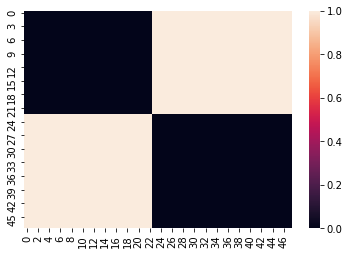

In [11]:
sns.heatmap(rdm)
plt.show()

Covariance plot for 'EBA' region

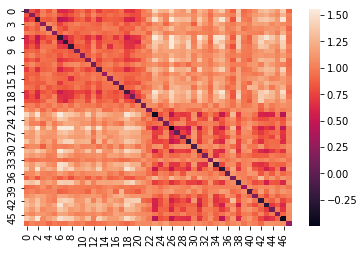

In [12]:
Ms = []
for sub in subs:
    _, M = rsa("EBA", sub, rdm, ids_)
    Ms.append(M)

Ms = np.array(Ms)
Ms = np.mean(Ms, axis=0)
sns.heatmap(Ms)
plt.show()

Covariance plot for 'FFA' region

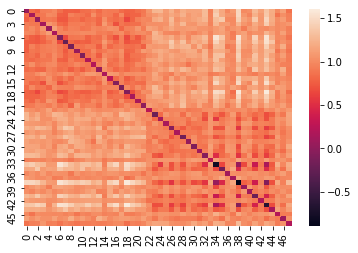

In [13]:
Ms = []
for sub in subs:
    _, M = rsa("FFA", sub, rdm, ids_)
    Ms.append(M)

Ms = np.array(Ms)
Ms = np.mean(Ms, axis=0)
sns.heatmap(Ms)
plt.show()

Covariance plot for 'V1' region

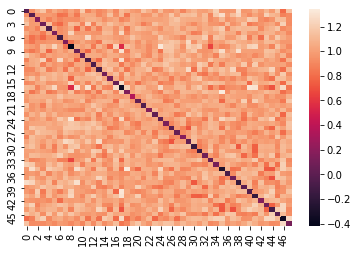

In [14]:
Ms = []
for sub in subs:
    _, M = rsa("V1", sub, rdm, ids_)
    Ms.append(M)

Ms = np.array(Ms)
Ms = np.mean(Ms, axis=0)
sns.heatmap(Ms)
plt.show()

Average correlation across subjects

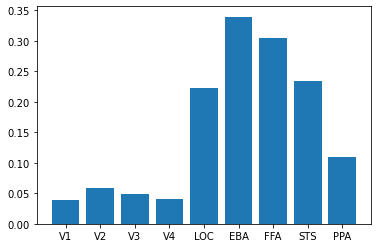

In [15]:
results = []
for sub in subs:
    res = []
    for roi in rois:
        c, _ = rsa(roi, sub, rdm, ids_)
        res.append(c)
    results.append(res)

results = np.array(results)
results = pd.DataFrame(results, columns=rois)
res = list(results.mean())
plt.bar(rois, res)
plt.show()

## Sanity Check
To verify that the abive correlations are not an artifact of the analysis, try doing the same correlation but on every odd and even video in all 10 subjects and all roi.  The expectation is that the correlation will be much lower than above.

In [16]:
# sanity checking by using every other vid
# Condition RTM
max_vids = 1000
evens = []
odds = []
# Create list of videos having odd and even index 

for i in range (max_vids):
    if (i % 2 == 0):
        evens.append(i)
    else:
        odds.append(i)
#print(odds)
#print(evens)

testids = odds + evens
vids = [f"vid_{str(i)}" for i in range(max_vids)]

# Create ground truch RDM matrix
test_list = []
for v1 in testids:
    vt_list = []
    for v2 in range(1000):
        if v1 in odds:
            if v2 in odds:
                vt_list.append(0)
            else:
                vt_list.append(1)
        else:
            if v2 in evens:
                vt_list.append(0)
            else:
                vt_list.append(1)
    test_list.append(vt_list)

rdm = pd.DataFrame(test_list, columns = vids, index = vids)
rdm.to_csv("rdm_test.csv")

sanity = [i-1 for i in testids]

rois = ["V1", "V2", "V3", "V4","LOC", "EBA", "FFA","STS", "PPA"]

rdm = np.array(rdm)

print("Sanity check for even and odd vids")

display_subject_correlation(sanity)


Sanity check for even and odd vids
Subject:  sub01
ROI: V1, Correlation: -0.0011468794238279302
ROI: V2, Correlation: -0.001872662876471342
ROI: V3, Correlation: -0.002238499185648252
ROI: V4, Correlation: -0.0017310387507091373
ROI: LOC, Correlation: -0.001190740851591436
ROI: EBA, Correlation: -0.0019233804316266543
ROI: FFA, Correlation: 0.00046840658709712915
ROI: STS, Correlation: 0.0006653770451858137
ROI: PPA, Correlation: 0.0009522400456975018
Subject:  sub02
ROI: V1, Correlation: -6.226212922410376e-05
ROI: V2, Correlation: 0.00035186603429747523
ROI: V3, Correlation: 0.001288482297917931
ROI: V4, Correlation: 0.00016928524494744197
ROI: LOC, Correlation: 0.0028598531776072578
ROI: EBA, Correlation: 0.0014627169333146044
ROI: FFA, Correlation: 0.0007288931247975541
ROI: STS, Correlation: -0.0006980533168747416
ROI: PPA, Correlation: 0.0026354538362314875
Subject:  sub03
ROI: V1, Correlation: 0.0005723572868763447
ROI: V2, Correlation: 0.0006068089326152261
ROI: V3, Correlation

## Searchlighting and Visualizing the Data

[Searchlight](https://nilearn.github.io/auto_examples/02_decoding/plot_haxby_searchlight.html)
and visualize the fmri data



In [17]:
def get_fmri(fmri_dir, ROI):
    """This function loads fMRI data into a numpy array for to a given ROI.
    Parameters
    ----------
    fmri_dir : str
        path to fMRI data.
    ROI : str
        name of ROI.
    Returns
    -------
    np.array
        matrix of dimensions #train_vids x #repetitions x #voxels
        containing fMRI responses to train videos of a given ROI
    """


    # Loading ROI data
    ROI_file = f"{fmri_dir}/{ROI}.pkl"
    ROI_data = load_dict(ROI_file)

    # averaging ROI data across repetitions
    ROI_data_train = np.mean(ROI_data["train"], axis = 1)
    if ROI == "WB":
        voxel_mask = ROI_data['voxel_mask']
        return ROI_data_train, voxel_mask

    return ROI_data_train

def saveasnii(brain_mask,nii_save_path,nii_data):
    img = nib.load(brain_mask)
    nii_img = nib.Nifti1Image(nii_data, img.affine, img.header)
    nib.save(nii_img, nii_save_path)
    return

## Restrict to humans and vehicles



In [18]:
def process_algonauts(vid_ids,sub):
    # Setting up the paths for whole brain data
    fmri_dir = './participants_data_v2021' 
    track = "full_track"

    # get the right track directory depending on whole brain/ROI choice
    track_dir = os.path.join(fmri_dir, track)  

    # get the selected subject's directory 
    sub_fmri_dir = os.path.join(track_dir, sub)
  
    #result directory to store nifti file
    results_dir = f'./content/{sub}/'
    
    nii_files = []
    # mapping the data to voxels and storing in a nifti file
    for vid_id in vid_ids:
        fmri_train_all,voxel_mask = get_fmri(sub_fmri_dir,"WB") 
        visual_mask_3D = np.zeros((78,93,71))
        visual_mask_3D[voxel_mask==1]= fmri_train_all[vid_id,:] 
        nii_files.append(np.expand_dims(visual_mask_3D,axis=3))
    brain_mask = './example.nii'
    nii_save_path =  os.path.join(results_dir, 'vid_activity.nii')
    nii_file = np.concatenate(nii_files, axis=3)
    saveasnii(brain_mask,nii_save_path,nii_file)
    
process_algonauts(ids, 'sub01')
fmri_filename_ = './content/sub01/vid_activity.nii'
fmri_img_ = load_img(fmri_filename_)
nii_data = fmri_img_.get_data()
nii_unique = list(np.unique(nii_data))
nii_dict = {j:i for i,j in enumerate(nii_unique)}
nii_file_ = np.vectorize(nii_dict.get)(nii_data)
brain_mask = './example.nii'
results_dir = './content/sub01/'
nii_save_path =  os.path.join(results_dir, 'vid_activity.nii')
saveasnii(brain_mask,nii_save_path,nii_file_)
path = "participants_data_v2021/full_track/sub01/WB.pkl"
s1 = load_dict(path)
mask_img = s1["voxel_mask"]
mask_img = mask_img.astype(int)
saveasnii(brain_mask, './content/sub01/mask.nii', mask_img)

In [19]:
y = ["vehicle"] * 23 + ["human"] * 25
mask_img_ = load_img('./content/sub01/mask.nii')

In [20]:
n_jobs = 1

# Define the cross-validation scheme used for validation.
# Here we use a KFold cross-validation on the session, which corresponds to
# splitting the samples in 4 folds and make 4 runs using each fold as a test
# set once and the others as learning sets
from sklearn.model_selection import KFold
cv = KFold(n_splits=4)

import nilearn.decoding
# The radius is the one of the Searchlight sphere that will scan the volume
searchlight = nilearn.decoding.SearchLight(
    mask_img_,
    radius=5.6, n_jobs=n_jobs,
    verbose=1, cv=cv)
searchlight.fit(fmri_img_, y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.5min finished


SearchLight(cv=KFold(n_splits=4, random_state=None, shuffle=False),
            mask_img=<nibabel.nifti1.Nifti1Image object at 0x0000015EA1611708>,
            radius=5.6, verbose=1)

In [21]:
session = [1]*48
# For decoding, standardizing is often very important
nifti_masker = NiftiMasker(mask_img=mask_img_, sessions=session,
                           standardize=True, memory='nilearn_cache',
                           memory_level=1)
fmri_masked = nifti_masker.fit_transform(fmri_img_)

from sklearn.feature_selection import f_classif
f_values, p_values = f_classif(fmri_masked, y)
p_values = -np.log10(p_values)
p_values[p_values > 10] = 10
p_unmasked = get_data(nifti_masker.inverse_transform(p_values))

process_mask_ = get_data(mask_img_).astype(np.int)

### Plotting

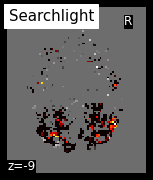

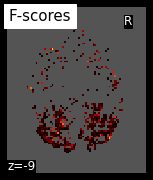

In [22]:
mean_fmri = image.mean_img(fmri_img_)

from nilearn.plotting import plot_stat_map, plot_img, show
searchlight_img = new_img_like(mean_fmri, searchlight.scores_)

# Because scores are not a zero-center test statistics, we cannot use
# plot_stat_map
plot_img(searchlight_img, bg_img=mean_fmri,
         title="Searchlight", display_mode="z", cut_coords=[-9],
         vmin=.42, cmap='hot', threshold=.2, black_bg=True)

# F_score results
p_ma = np.ma.array(p_unmasked, mask=np.logical_not(process_mask_))
f_score_img = new_img_like(mean_fmri, p_ma)
plot_stat_map(f_score_img, mean_fmri,
              title="F-scores", display_mode="z",
              cut_coords=[-9],
              colorbar=False)

show()

## Data visualization

In [23]:
def visualize_activity(vid_id,sub):
  # Setting up the paths for whole brain data
  fmri_dir = './participants_data_v2021' 
  track = "full_track"

  # get the right track directory depending on whole brain/ROI choice
  track_dir = os.path.join(fmri_dir, track)  

  # get the selected subject's directory 
  sub_fmri_dir = os.path.join(track_dir, sub)
  
  #result directory to store nifti file
  results_dir = './content/'

  # mapping the data to voxels and storing in a nifti file
  fmri_train_all,voxel_mask = get_fmri(sub_fmri_dir,"WB") 
  visual_mask_3D = np.zeros((78,93,71))
  visual_mask_3D[voxel_mask==1]= fmri_train_all[vid_id,:] 
  brain_mask = './example.nii'
  nii_save_path =  os.path.join(results_dir, 'vid_activity.nii')
  saveasnii(brain_mask,nii_save_path,visual_mask_3D)

  # visualizing saved nifti file
  plotting.plot_glass_brain(nii_save_path,
                          title='fMRI response',plot_abs=False,
                          display_mode='lyr',colorbar=True)

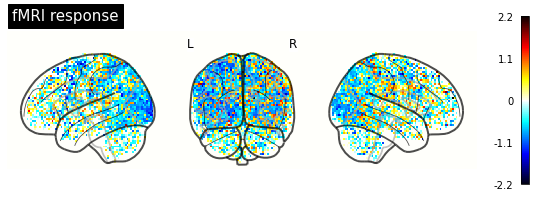

In [24]:
visualize_activity(12, 'sub01')

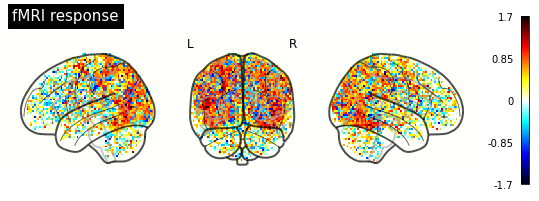

In [25]:
visualize_activity(2, 'sub01')

## Conclusions
Using RSA and searchlight algorithms we analyzed areas in the brain that helps us distinguish between humans and vehicles.

## Limitations and Future Directions
- List of Limitations
With this paper, we focused mainly on the what question of is there a difference in the fMRI data for subjects when shown videos of people vs videos of vehicles.  This is a fairly narrow question, so it may be difficult to draw broader conclusions from this research.  How questions like, how does the brain absorb that visual information and produce these differing patterns in it's higher regions?  Also, why questions such as those discussed below would need further research. 
- List of Future Directions and Elaboration of these ideas
1. Semantic Priming
There is a concept in psychology called semantic priming, where a person's psychology is affected in subtle ways by being exposed to certain words before some other psychological experiment.  For example, Daniel Ariely (need a citation) has done research on cheating, and has done psychological experiments where he exposed the subjects to items like the 10 commandments before testing whether people will cheat.  One ideas for future research would be to rerun such experiments and measuring the brain to see if you can correlate the semantic priming with fMRI (or other brain measurements) to see if one can add insight into such experiments in a tangible way.  In other words, can you "see" semantic priming happening in the brain. And also, can you use that insight to draw conclusions that couldn't otherwise be made?
2. Cognition and evolution of the Human Brain
To give a scale of perceptive cognition in the line of evolutionary brain development, we have on the one hand non-human primates, and other mammals who have varying degrees of cognitive power.  Whereas, humans can distinguish animate vs inanimate objects (humans vs vehicles), dogs cannot even tell that a vacuum cleaner isn’t an animate object. Above dogs, on this cognitive scale, would be other primates, but somewhere along the line of evolution humans also  learned to recognize themselves in a mirror (self-awareness).  Other primates are unable to do this. Elephants  and dolphins can match this level of cognition, but can we pinpoint the differences in brains which are self aware vs brains that are not able to recognize themselves in the mirror?  To get a better understanding of the mechanism of cognition, it would be good to understand how visual perception in the brain really works.  